In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point, LineString
from units.feature_engineering import collapse_gdf_to_linestring, merge_gdf
from units.plot import plot_correlation_matrix
import numpy as np
from tqdm import tqdm

# o18 h2

In [2]:
# xử lý cột ngày đưa về đúng format
# isotope_df = pd.read_csv('Nguyen-et-al_data_stable-isotopes-An-Long-Mekong-Delta.csv')
# isotope_df['Date'] = pd.to_datetime(isotope_df['Date'], format="%d/%m/%Y")
# isotope_df.to_excel('Nguyen-et-al_data_stable-isotopes-An-Long-Mekong-Delta.xlsx', index=False)

In [2]:
isotope_df = pd.read_excel('Nguyen-et-al_data_stable-isotopes-An-Long-Mekong-Delta.xlsx', 
                           index_col='Date')

In [3]:
isotope_df = isotope_df[['No', 'Name of site', 'Country', 'Latitude [decimal degree WGS84]',
       'Longitude [decimal degree WGS84]', 'Altitude [m a.s.l.]',
       'Type of Site', 'Laboratory', 'Sampling frequency', 'd18O', 'd2H', 'd-excess',
       'Precipitation']]

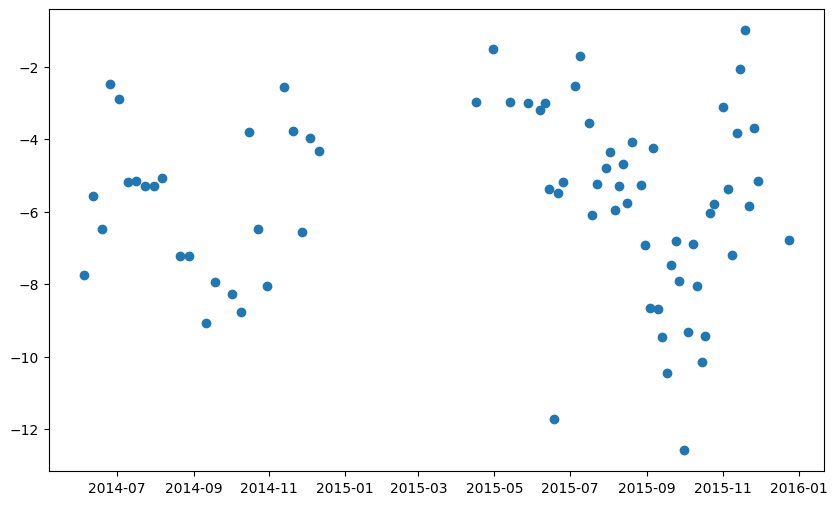

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(isotope_df.index, isotope_df.d18O)
plt.show()

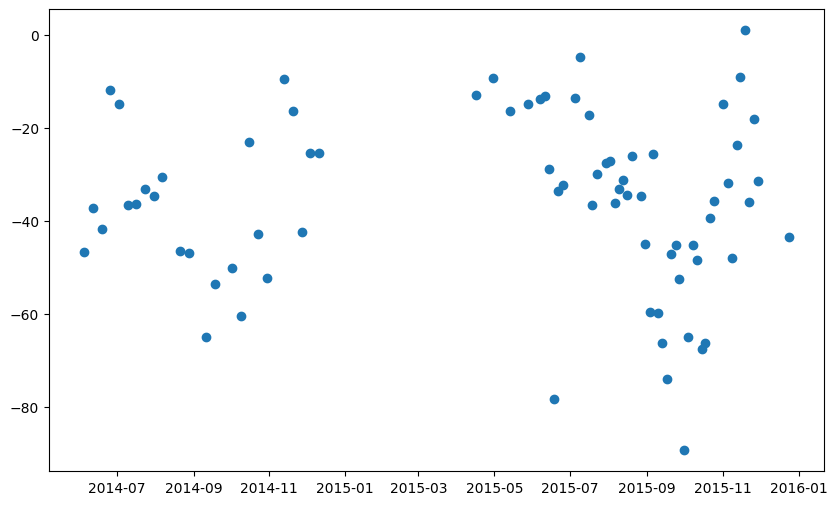

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(isotope_df.index, isotope_df.d2H)
plt.show()

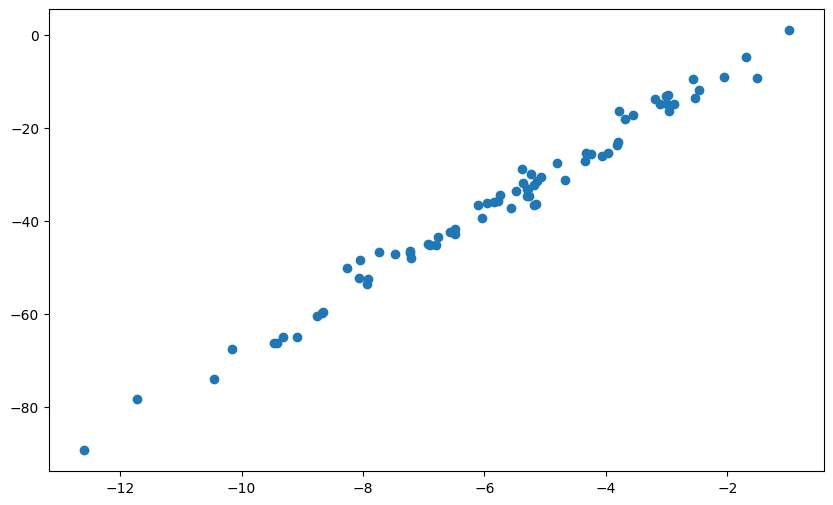

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(isotope_df.d18O, isotope_df.d2H)
plt.show()

In [7]:
isotope_df

,No,Name of site,Country,Latitude [decimal degree WGS84],Longitude [decimal degree WGS84],Altitude [m a.s.l.],Type of Site,Laboratory,Sampling frequency,d18O,d2H,d-excess,Precipitation
Date,,,,,,,,,,,,,
2014-06-05,1,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,weekly,-7.74,-46.63,15.26,40.2
2014-06-12,2,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,weekly,-5.56,-37.30,7.22,26.5
2014-06-19,3,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,weekly,-6.49,-41.86,10.04,50.9
2014-06-26,4,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,weekly,-2.47,-11.86,7.86,19.6
2014-07-03,5,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,weekly,-2.88,-15.02,8.02,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-19,70,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,semiweekly,-0.99,0.91,8.86,16.2
2015-11-22,71,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,semiweekly,-5.84,-35.95,10.75,16.7
2015-11-26,72,An Long,Vietnam,105.379,10.699,2,Precipitation collectors,Alfred-Wegener-Institute,semiweekly,-3.69,-18.07,11.48,18.1


# hysplit

In [8]:
# folder = 'O:/Tran Xuan Thuy/iWAT/hysplit/processed_geojson_3103'
# files = os.listdir(folder)
# merge, cal mean, linestring
# merged_gdf = merge_gdf(folder)
# merged_gdf.to_file('final_result.geojson')

In [9]:
gdf = gpd.read_file('final_result.geojson')

gdf_1 = gdf.loc[gdf['heigh_code'] == 1]
gdf_2 = gdf.loc[gdf['heigh_code'] == 2]
gdf_3 = gdf.loc[gdf['heigh_code'] == 3]

gdf_1.index = gdf_1['datetime']
gdf_2.index = gdf_2['datetime']
gdf_3.index = gdf_3['datetime']

In [10]:
gdf_2.head(2)

,height,pressure,theta,air_temp,rainfall,mixdepth,relhumid,spchumid,h2omixra,terr_msl,sun_flux,length,datetime,heigh_code,geometry
datetime,,,,,,,,,,,,,,,
2014-06-01 00:00:00,1699.572614,829.888797,307.678423,291.592531,95.9,588.165560,75.686722,12.002490,12.240249,3491.9,66638.7,32.654065,2014-06-01 00:00:00,2,"LINESTRING (105.24 10.72, 105.24 10.667, 105.2..."
2014-06-01 06:00:00,488.227801,952.482988,302.880913,298.624066,85.9,444.289627,76.297925,16.179253,16.615353,5875.5,70028.3,18.438882,2014-06-01 06:00:00,2,"LINESTRING (105.24 10.72, 105.204 10.656, 105...."


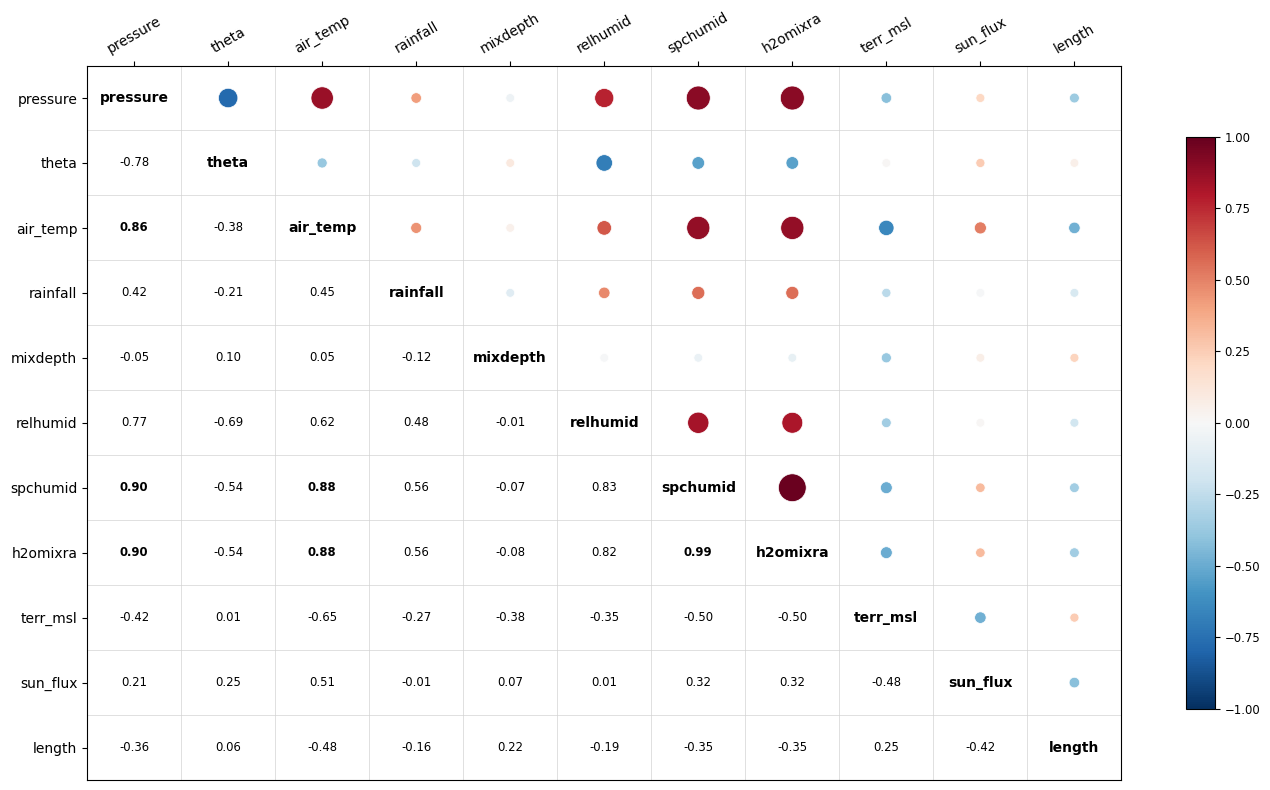

In [11]:
plot_correlation_matrix(gdf_2, save_path='1500_corr.png')

# old method

In [12]:
previous_week_averages = {}
for date_y in isotope_df.index:
    # định cửa sổ thời gian cho tuần trước.
    start_date = date_y - pd.Timedelta(days=7)
    end_date = date_y
    # Lọc 'x' để chọn dữ liệu trong cửa sổ đã xác định.
    x_in_window = gdf_2[(gdf_2.index >= start_date) & (gdf_2.index < end_date)]
    x_in_window = x_in_window.iloc[:, 0:-3]
    # Tính toán giá trị trung bình của các giá trị 'x' đã chọn.
    if not x_in_window.empty:
        average_x = x_in_window.mean()
        previous_week_averages[date_y] = average_x
    else:
        previous_week_averages[date_y] = pd.NA # Hoặc một giá trị phù hợp khác cho trường hợp không có dữ liệu

In [13]:
previous_week_averages_df = pd.DataFrame(previous_week_averages).T

In [14]:
merged_df = isotope_df.join(previous_week_averages_df, how='outer')

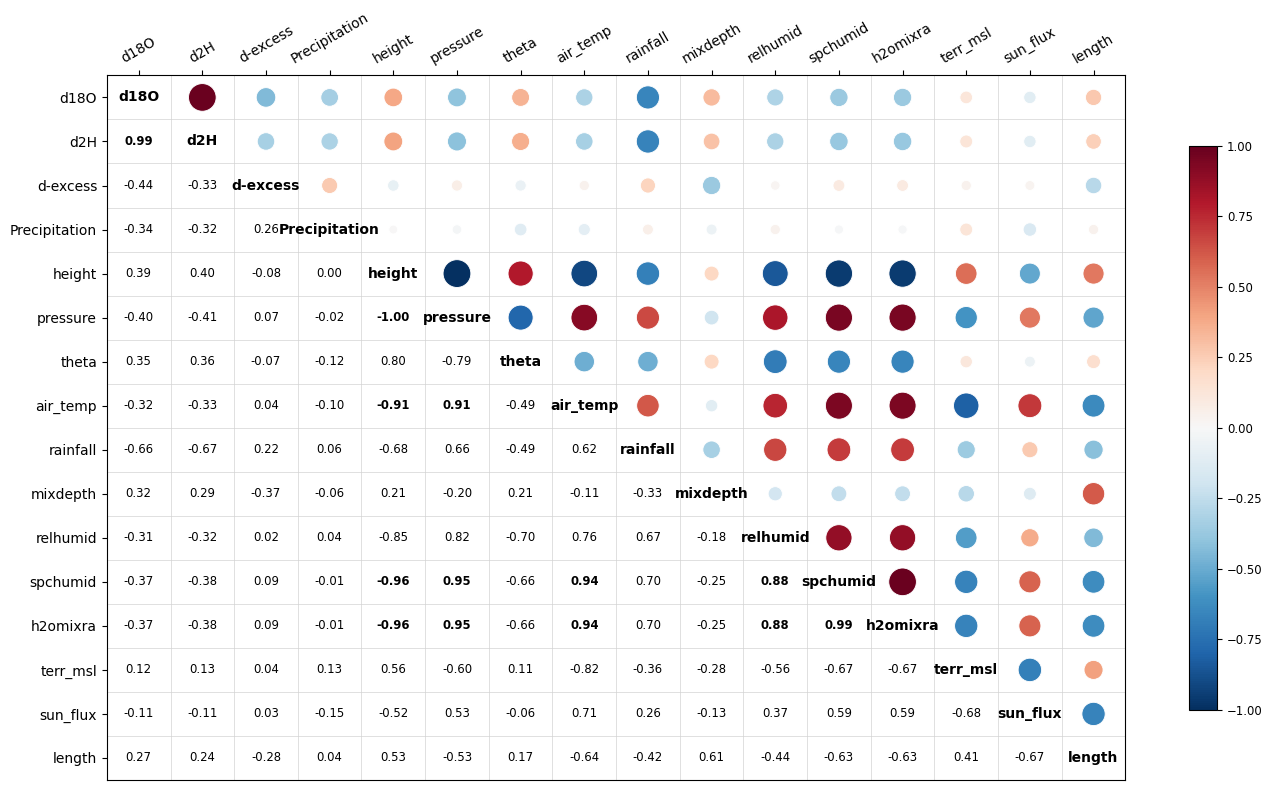

In [15]:
columns = ['d18O', 'd2H', 'd-excess', 'Precipitation', 'height', 'pressure',
       'theta', 'air_temp', 'rainfall', 'mixdepth', 'relhumid', 'spchumid',
       'h2omixra', 'terr_msl', 'sun_flux', 'length']
plot_correlation_matrix(merged_df, exponent=1, columns=columns)